In [24]:
import time
import numpy as np
import random
import psutil
import matplotlib.pyplot as plt

In [25]:
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)


In [26]:
def selection_sort(array, length):
    count = 0

    start_time = time.time() 
    mem_before = memory_usage()
    
    for i in range(length):
        min_index = i 
        for j in range( i + 1, length): 
            if array[min_index] > array[j]:
               min_index = j
               count += 1

        array[i], array[j] = array[j], array[i]

    mem_after = memory_usage()
    end_time = time.time()

    print(f"Execution time: {end_time - start_time} s")
    print(f"CPU: {mem_after - mem_before} mb")
    print(f"Number of swaps: {count}")

    return array

In [27]:
def Bubble_sort(array, length):
    count = 0
    start_time = time.time()
    mem_before = memory_usage()

    for i in range(length):
        for j in range(0, length - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]  
                count += 1

    end_time = time.time()
    mem_after = memory_usage()

    print(f"Execution time : {end_time - start_time} s")
    print(f"Memory usage: {mem_after - mem_before:.2f} MB")
    print(f"Number of swaps: {count}")

    return array

In [28]:
def insertion_sort_by_shifting(arr, length):
    start_time = time.time()
    mem_before = memory_usage()
    count = 0 

    for i in range(1, length):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]  
            j -= 1
            count += 1

    mem_after = memory_usage()
    end_time = time.time()

    print(f"Execution time: {end_time - start_time} s")
    print(f"Memory usage: {mem_after - mem_before:.2f} MB")
    print(f"Number of swaps: {count}")

    return arr

In [29]:
def insertion_sort_by_exchanges(arr, length):
    start_time = time.time()
    mem_before = memory_usage()
    count = 0 

    for i in range(1, length):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]  # Swap elements
            count += 1
            j -= 1

    mem_after = memory_usage()
    end_time = time.time()

    print(f"Execution time: {end_time - start_time} s")
    print(f"Memory usage: {mem_after - mem_before:.2f} MB")
    print(f"Number of swaps: {count}")

    return arr


In [30]:
algorithms = [selection_sort,Bubble_sort, insertion_sort_by_shifting, insertion_sort_by_exchanges]
lengths = [10, 100, 1000, 10000]
orders = ["Random", "Sorted", "Descending"]
results = {}

In [31]:
def generate_algorithms(algorithms, lengths, orders):
    for algo in algorithms:
        algo_name = algo.__name__
        results[algo_name] = {l: {"exec_time": [], "swaps": []} for l in lengths}
        for l in lengths:
            for o in orders:
                print(f"\nAlgorithm: {algo_name}, Length: {l}, Order: {o}")
                if o == "Random":
                    arr = [random.randint(0, 10000) for _ in range(l)]
                elif o == "Sorted":
                    arr = list(range(l))
                else:
                    arr = list(range(l, 0, -1))

                start_time = time.time()
                mem_before = memory_usage()
                swaps = algo(arr.copy(), l)
                mem_after = memory_usage()
                end_time = time.time()

                exec_time = end_time - start_time

                results[algo_name][l]["exec_time"].append(exec_time)
                results[algo_name][l]["swaps"].append(swaps)

                print(f"Execution time: {exec_time:.4f} s")
                print(f"Memory usage: {mem_after - mem_before:.2f} MB")

In [32]:
generate_algorithms(algorithms, lengths, orders)


Algorithm: selection_sort, Length: 10, Order: Random
Execution time: 0.0009963512420654297 s
CPU: 0.0 mb
Number of swaps: 24
Execution time: 0.0010 s
Memory usage: 0.00 MB

Algorithm: selection_sort, Length: 10, Order: Sorted
Execution time: 0.0 s
CPU: 0.0 mb
Number of swaps: 8
Execution time: 0.0000 s
Memory usage: 0.00 MB

Algorithm: selection_sort, Length: 10, Order: Descending
Execution time: 0.0 s
CPU: 0.0 mb
Number of swaps: 37
Execution time: 0.0000 s
Memory usage: 0.00 MB

Algorithm: selection_sort, Length: 100, Order: Random
Execution time: 0.0009968280792236328 s
CPU: 0.0 mb
Number of swaps: 328
Execution time: 0.0010 s
Memory usage: 0.00 MB

Algorithm: selection_sort, Length: 100, Order: Sorted
Execution time: 0.0009987354278564453 s
CPU: 0.0 mb
Number of swaps: 98
Execution time: 0.0010 s
Memory usage: 0.00 MB

Algorithm: selection_sort, Length: 100, Order: Descending
Execution time: 0.0019953250885009766 s
CPU: 0.0 mb
Number of swaps: 4852
Execution time: 0.0020 s
Memory 

In [35]:
def plot_results(results):
    for algo_name, data in results.items():
        plt.figure(figsize=(12, 6))
        plt.title(f'Execution Time and Number of Swaps for {algo_name}')
        
        exec_time = [np.mean(data[l]['exec_time']) for l in lengths]
        swaps = [np.mean(data[l]['swaps']) for l in lengths]
        
        plt.plot(lengths, exec_time, label='Execution Time (s)', marker='o')
        plt.plot(lengths, swaps, label='Number of Swaps', marker='x')
        
        plt.xlabel('Array Length')
        plt.ylabel('Average Value')
        plt.legend()
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.show()


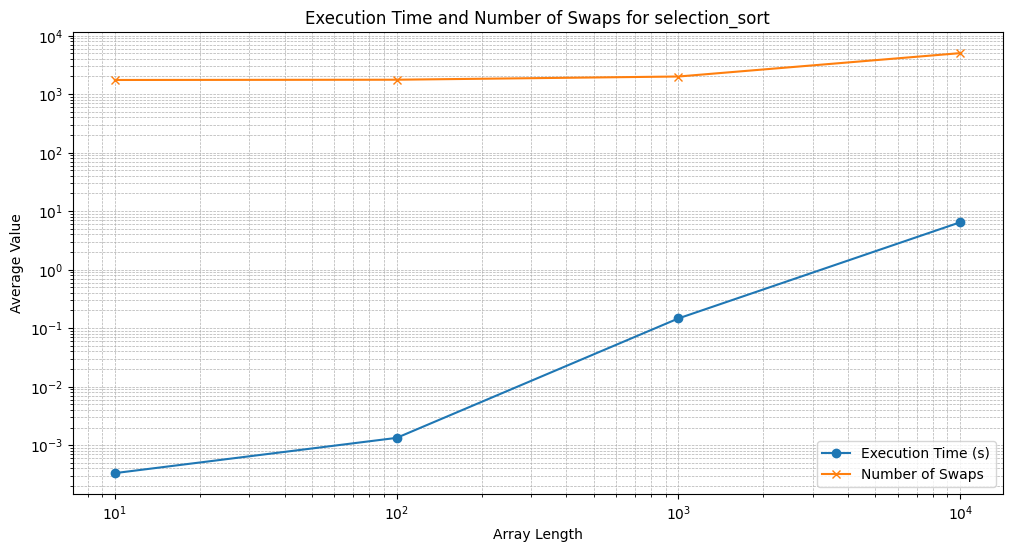

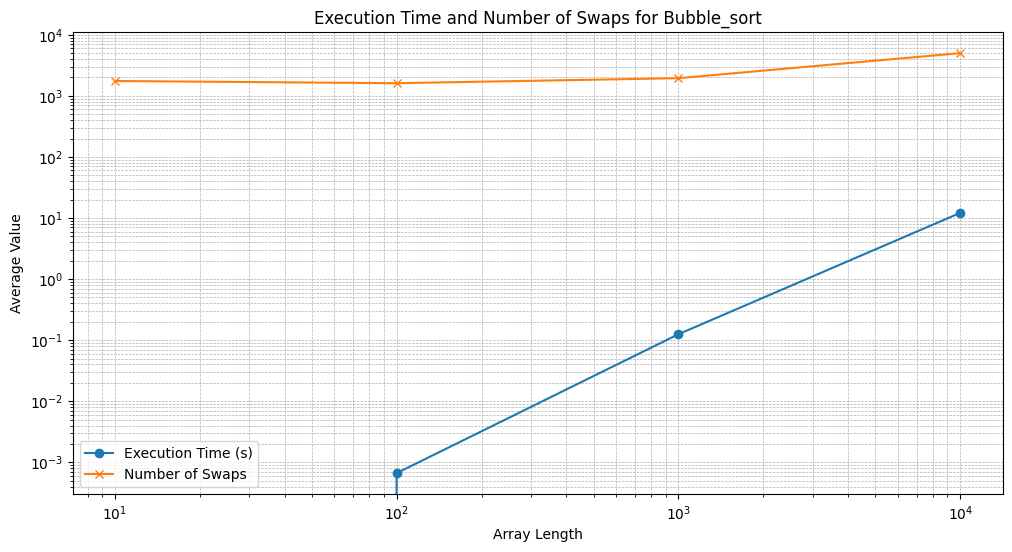

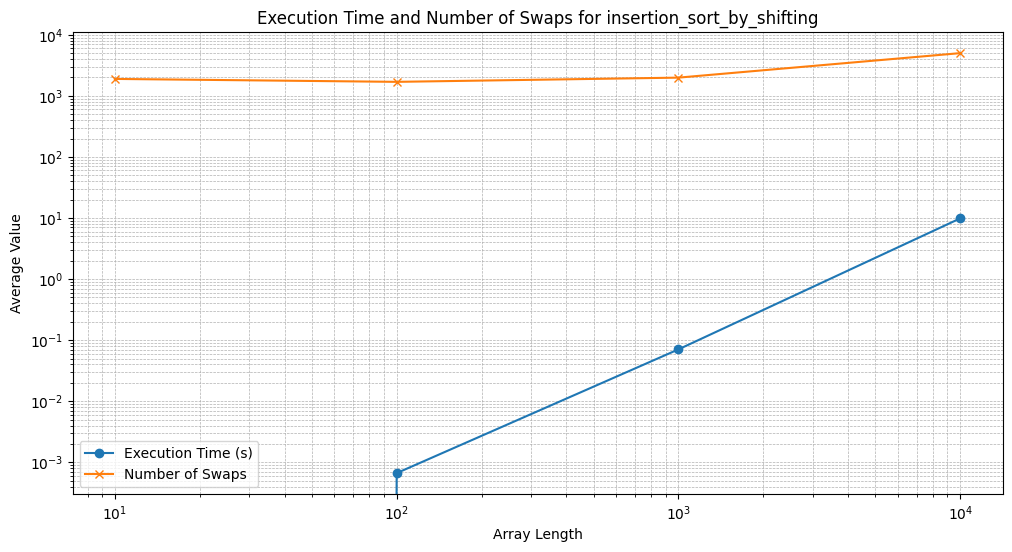

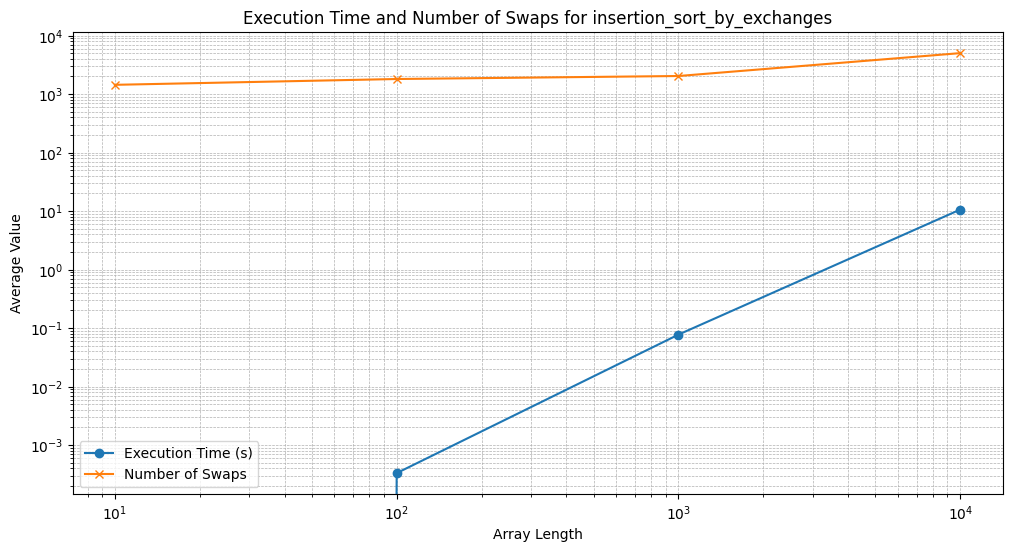

In [34]:
plot_results(results)